# Занятие №2. Знакомство с понятием Dataset на примере Fashion-Mnist

### Готовые DatasetЫ

В популярных библиотеках машинного обучения (например, [Scikit-learn](https://scikit-learn.org/stable/)) и построения нейросетей (например, [Tensorflow](https://www.tensorflow.org/guide/keras?hl=ru)) есть множество уже готовых датасетов. 

Поработаем сегодня с датасетом [Fashion-Mnist](https://www.kaggle.com/zalando-research/fashionmnist).

In [1]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [0]:
# Выполняем загрузку DatasetА

( x_train, y_train ), ( x_test, y_test ) = fashion_mnist.load_data()

Dataset **Fashio-Mnist** состоит из элементов одежды. Пример изображений из датасета:

![alt text](https://tensorflow.org/images/fashion-mnist-sprite.png)

Всего представлено 10 классов:

<table>
  <tr>
    <th>Метка</th>
    <th>Класс</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>Футболка / топ</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Шорты</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Свитер</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Платье</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Плащ</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Сандали</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Рубашка</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Кроссовок</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Сумка</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ботинок</td> 
  </tr>
</table>


Посмотрим каким образом эти данные содержаться в датасете.

Выше мы загрузили данные в переменные **x_train** и **x_test**.

Немного позже обсудим для чего их две и чем они отличаются.

Что находится в **x_train**?

In [4]:
print('Тип данных: ', type(x_train))
print('Размеры датасета: ', x_train.shape)

Тип данных:  <class 'numpy.ndarray'>
Размеры датасета:  (60000, 28, 28)


Каждое изображение представляет собой квадратную таблицу размеров 28x28, в каждой ячейке число от 0 до 255. Число определяет интенсивность черного цвета пикселя.

In [0]:
# Так изображение хранится в памяти 
x_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [0]:
# В массиве y_train находятся метки изображений датасета x_train
y_train[10]

0

Убедимся, что перед нами действительно футболка.

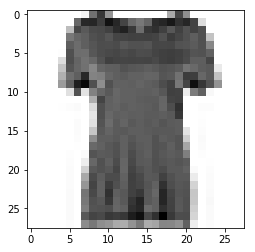

In [5]:
# Отобразим картинку на экране
import matplotlib.pyplot as plt

image = x_train[10]

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
#plt.colorbar()
plt.grid(False)
plt.show()

#### Задача 1
Написать функцию: на вход подается датасет и номер картинки.

Функция выводит изображение на экран.

In [0]:
def output_image(data, N): # data - весь датасет, N - номер картинки
  image = data[N]
  plt.figure()
  plt.imshow(image, cmap=plt.cm.binary)
#plt.colorbar()
  plt.grid(False)
  plt.show()

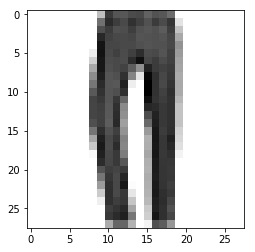

In [0]:
output_image(x_train, 20200)

### Реализуем простейшую нейронную сеть

На вход нейронной сети подается изображение 28х28. Изображение конвертируется в одномерный массив размера 1 х 784.
Нейронная сеть содержит один скрытый слой из 128 нейроном. Выходом нейросети является массив размерности 10 (количество классов классификации). Перое значение массива соответствует классу 0, второе значение классу 1 и т.д. Индекс самого большого значения в выходном векторе будет являться ответом нейросети.
![alt text](https://drive.google.com/uc?export=view&id=1yYutQemjgMOybCtX5AC2NCvgaUWJgPwL)

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()

model.add(   Dense(128, input_shape=(784,))    )

model.add(Activation('sigmoid'))

model.add(Dense(10))

model.add(Activation('softmax'))

In [0]:
#Выведем краткие характеристики нейронной сети
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# ПАРАМЕТРЫ ПРЕДВАРИТЕЛЬНОЙ НАСТРОЙКИ НЕЙРОСЕТИ на данном уроке не обсуждаются

from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), 
              metrics=['accuracy'])


In [0]:
# Выполним необходимые преобраования с данными для подачи их в метод обучения нейронной сети
from keras import utils as np_utils

x_train = x_train.reshape(60000,784)

y_train = np_utils.to_categorical(y_train, 10)

In [0]:
model.fit(x_train, y_train, batch_size=100, epochs=5 )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 3s 57us/step - loss: 0.8434 - acc: 0.7234
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.6686 - acc: 0.7676
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.6551 - acc: 0.7674
Epoch 4/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.6387 - acc: 0.7732
Epoch 5/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.6381 - acc: 0.7704


Выполним проверку работы нейронной сети на нескольких изображениях

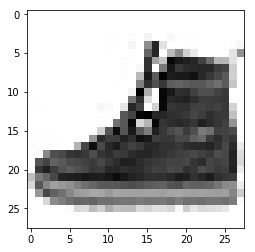

In [0]:
number_of_image = 2550
output_image(x_test, number_of_image)

In [0]:
y_test[number_of_image]

9

In [0]:
import numpy as np
print(model.predict(x_test[number_of_image].reshape(1,784)))
np.argmax(model.predict(x_test[number_of_image].reshape(1,784)))

[[7.9985801e-04 2.0298406e-03 1.5520788e-03 9.1310515e-04 9.4157195e-04
  3.9689161e-02 8.3737192e-04 6.1180610e-02 5.2149384e-03 8.8684148e-01]]


Найдите 5 - 10 номеров изображений, на которых нейросеть допустила ошибку

#### Задача 2
На шаге подготовки данных для подачи в метод обучения нейронной сети выполните нормировку данных.

Код:

x_train = x_train.reshape(60000,784)

замените на код

x_train_norm = x_train.reshape(60000,784)/255

Далее везде используйте x_train_norm вместо x_train.

**ВАЖНО!** Теперь при подаче на нейронную сеть изображения его необходимо нормировать!

*Сколько картинок из ранее не распознанных (которые вы нашли) теперь классифицируются верно?*

In [0]:
# Предикт будет выглядеть так
print(model.predict(x_test[number_of_image].reshape(1,784)/255))